In [2]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sn
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\sakshi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
#import data
data = pd.read_csv("metadata.csv", header=0)
print(len(data.director_name.unique()))
data.head(5)

2399


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
# clean data
# replace N/A  by mean
#data = data.replace(-1,np.nan)
data.num_critic_for_reviews = data.num_critic_for_reviews.fillna(data.num_critic_for_reviews.mean(skipna = True))
data.duration = data.duration.fillna(data.duration.mean(skipna = True))
data.director_facebook_likes = data.director_facebook_likes.fillna(data.director_facebook_likes.mean(skipna = True))
data.actor_3_facebook_likes = data.actor_3_facebook_likes.fillna(data.actor_3_facebook_likes.mean(skipna = True))
data.actor_1_facebook_likes = data.actor_1_facebook_likes.fillna(data.actor_1_facebook_likes.mean(skipna = True))
data.gross = data.gross.fillna(data.gross.mean(skipna = True))
data.num_user_for_reviews = data.num_user_for_reviews.fillna(data.num_user_for_reviews.mean(skipna = True))
data.budget = data.budget.fillna(data.budget.mean(skipna = True))
data.actor_2_facebook_likes = data.actor_2_facebook_likes.fillna(data.actor_2_facebook_likes.mean(skipna = True))
data.movie_facebook_likes = data.movie_facebook_likes.fillna(data.movie_facebook_likes.mean(skipna = True))
#print(data.describe())
print(data.head(5))

   color      director_name  num_critic_for_reviews    duration  \
0  Color      James Cameron              723.000000  178.000000   
1  Color     Gore Verbinski              302.000000  169.000000   
2  Color         Sam Mendes              602.000000  148.000000   
3  Color  Christopher Nolan              813.000000  164.000000   
4    NaN        Doug Walker              140.194272  107.201074   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0              855.000000  Joel David Moore   
1                    563.0             1000.000000     Orlando Bloom   
2                      0.0              161.000000      Rory Kinnear   
3                  22000.0            23000.000000    Christian Bale   
4                    131.0              645.009761        Rob Walker   

   actor_1_facebook_likes         gross                           genres  ...  \
0                  1000.0  7.605058e+08  Action|Adventure|Fantasy|Sci-Fi  ...   
1 

In [5]:
#convert columns to type float
data['num_critic_for_reviews'] = data['num_critic_for_reviews'].astype(float)
data['duration'] = data['duration'].astype(float)
data['director_facebook_likes'] = data['director_facebook_likes'].astype(float)
data['actor_3_facebook_likes'] = data['actor_3_facebook_likes'].astype(float)
data['actor_1_facebook_likes'] = data['actor_1_facebook_likes'].astype(float)
data['gross'] = data['gross'].astype(float)
data['num_user_for_reviews'] = data['num_user_for_reviews'].astype(float)
data['budget'] = data['budget'].astype(float)
data['actor_2_facebook_likes'] = data['actor_2_facebook_likes'].astype(float)
data['movie_facebook_likes'] = data['movie_facebook_likes'].astype(float)
data['imdb_score'] = data['imdb_score'].astype(float)

In [86]:
data.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.255242,0.178907,0.270935,0.189727,0.441966,0.623805,0.262899,-0.033728,0.608509,0.115756,0.274880,0.281758,0.302808,-0.049298,0.682669
duration,0.255242,1.000000,0.153708,0.123012,0.088377,0.204975,0.314597,0.123033,0.013378,0.326152,0.064412,-0.135021,0.131229,0.260886,-0.089201,0.196565
director_facebook_likes,0.178907,0.153708,1.000000,0.120120,0.090555,0.139229,0.296271,0.119307,-0.040825,0.221167,0.020907,-0.063820,0.119482,0.167567,0.000058,0.161420
actor_3_facebook_likes,0.270935,0.123012,0.120120,1.000000,0.249855,0.304314,0.287041,0.473629,0.099284,0.229994,0.047095,0.095766,0.559570,0.052488,-0.003355,0.278753
actor_1_facebook_likes,0.189727,0.088377,0.090555,0.249855,1.000000,0.140581,0.192755,0.951472,0.072241,0.145372,0.022324,0.086844,0.390443,0.076044,-0.020043,0.135336
gross,0.441966,0.204975,0.139229,0.304314,0.140581,1.000000,0.615385,0.229040,-0.025559,0.538448,0.101437,0.022626,0.258099,0.168169,0.014918,0.369427
num_voted_users,0.623805,0.314597,0.296271,0.287041,0.192755,0.615385,1.000000,0.265911,-0.026998,0.797797,0.078495,0.007397,0.270675,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.262899,0.123033,0.119307,0.473629,0.951472,0.229040,0.265911,1.000000,0.091475,0.206828,0.036028,0.109971,0.628173,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033728,0.013378,-0.040825,0.099284,0.072241,-0.025559,-0.026998,0.091475,1.000000,-0.068922,-0.018714,0.061504,0.071192,-0.062958,0.013713,0.008918
num_user_for_reviews,0.608509,0.326152,0.221167,0.229994,0.145372,0.538448,0.797797,0.206828,-0.068922,1.000000,0.082879,-0.003167,0.219346,0.291472,-0.024700,0.400469


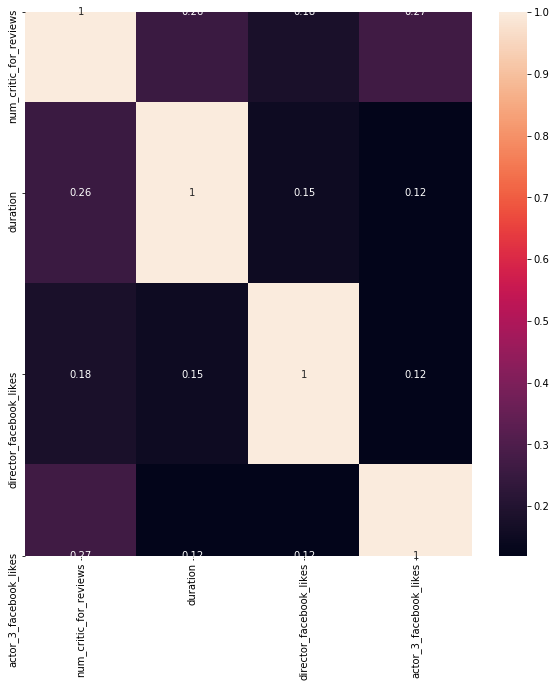

In [87]:
columns_corr = [*data.columns[1:7]]
corrMatrix = data[columns_corr].corr()

fig, ax = plt.subplots(figsize=(10,10))
ax = sn.heatmap(corrMatrix, annot=True)
plt.show()

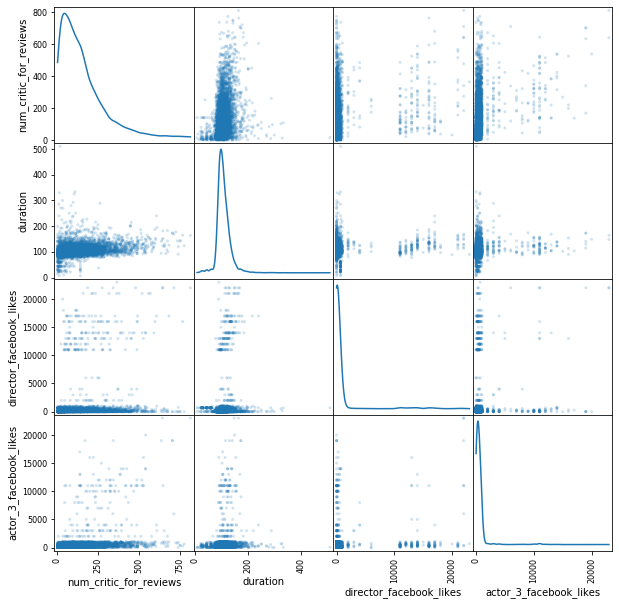

In [88]:
pd.plotting.scatter_matrix(data[columns_corr], alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

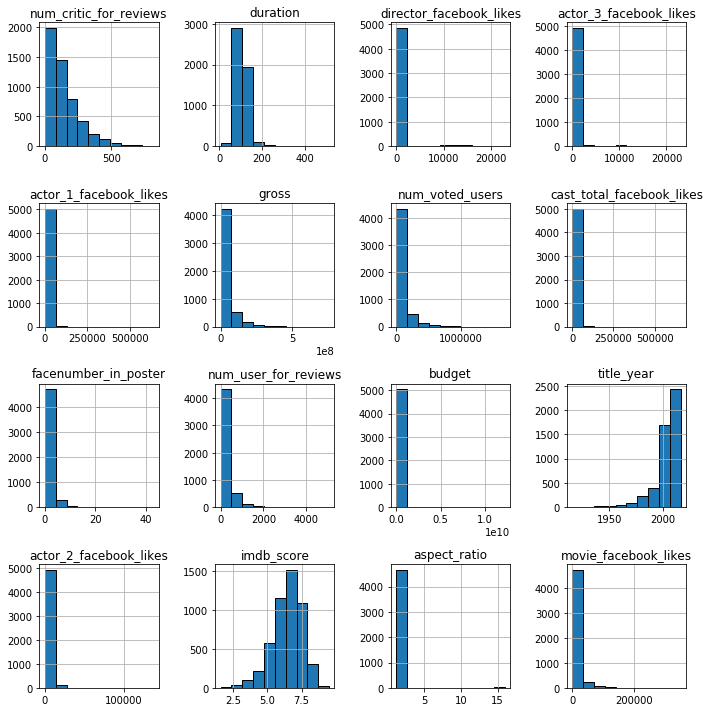

In [89]:
data.hist(figsize=(10,10),edgecolor="k")
plt.tight_layout()
plt.show()

In [109]:
data_main = data[['num_critic_for_reviews','duration','gross','imdb_score','director_facebook_likes', 'actor_3_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','movie_facebook_likes','budget','imdb_score']]
print(data_main)

      num_critic_for_reviews    duration         gross  imdb_score  \
0                 723.000000  178.000000  7.605058e+08         7.9   
1                 302.000000  169.000000  3.094042e+08         7.1   
2                 602.000000  148.000000  2.000742e+08         6.8   
3                 813.000000  164.000000  4.481306e+08         8.5   
4                 140.194272  107.201074  4.846841e+07         7.1   
...                      ...         ...           ...         ...   
5038                1.000000   87.000000  4.846841e+07         7.7   
5039               43.000000   43.000000  4.846841e+07         7.5   
5040               13.000000   76.000000  4.846841e+07         6.3   
5041               14.000000  100.000000  1.044300e+04         6.3   
5042               43.000000   90.000000  8.522200e+04         6.6   

      director_facebook_likes  actor_3_facebook_likes  actor_1_facebook_likes  \
0                    0.000000              855.000000                  1000.0 

In [124]:
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm
#num_critic_for_reviews','duration','gross','imdb_score']]#'director_facebook_likes', 'actor_3_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','movie_facebook_likes','budget','imdb_score'
formula = 'imdb_score ~ num_critic_for_reviews + duration  + director_facebook_likes + actor_3_facebook_likes + movie_facebook_likes'
#formula = 'imdb_score ~   director_facebook_likes + gross'
lm = ols(formula,data).fit_regularized(alpha=0.1,method='elastic_net',L1_wt=1,refit=True)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     138.5
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          6.39e-163
Time:                        17:46:32   Log-Likelihood:                -7364.7
No. Observations:                5043   AIC:                         1.474e+04
Df Residuals:                    5037   BIC:                         1.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [110]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_main, test_size = 0.2)

In [111]:
X_train, Y_train = train_data.drop('imdb_score',axis = 1), train_data['imdb_score']
X_test, Y_test = test_data.drop('imdb_score',axis = 1), test_data['imdb_score']
print(X_train)

      num_critic_for_reviews  duration         gross  director_facebook_likes  \
4843                     4.0     110.0  1.711000e+03                     44.0   
3342                    15.0     135.0  4.846841e+07                      0.0   
1748                   349.0     167.0  1.610293e+08                    473.0   
1152                   117.0      99.0  3.113695e+07                     23.0   
3752                    14.0     141.0  4.846841e+07                     54.0   
...                      ...       ...           ...                      ...   
3494                   202.0     105.0  1.258351e+07                      0.0   
3054                   203.0     109.0  3.330504e+07                     64.0   
4695                   228.0     108.0  3.204881e+07                    174.0   
3198                    57.0     135.0  2.185266e+06                      0.0   
4992                    10.0      92.0  4.846841e+07                      0.0   

      actor_3_facebook_like

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import accuracy_score

lr = LinearRegression()
lr = lr.fit(X_train,Y_train)
r_square_train = lr.score(X_train,Y_train)
r_square_test = lr.score(X_test,Y_test)
predict_test = lr.predict(X_test)
predict_train = lr.predict(X_train)

print(r_square_train,r_square_test)

res = dict()
metrics = dict()

res['lr'] = lr.coef_
metrics['lr'] = r2_score(Y_test, predict_test),explained_variance_score(Y_test,predict_test)
print(metrics)

0.14345112118817704 0.13737787444484295
{'lr': (0.13737787444484295, 0.13831308677738452)}


In [113]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf = clf.fit(X_train,Y_train)
predict_clf = clf.predict(X_test)

#print(clf.coef_)
res['lasso'] = clf.coef_
metrics['lasso'] = r2_score(Y_test, predict_clf),explained_variance_score(Y_test,predict_clf)
#print(res)
#print(metrics)

In [116]:
for r in res.items():
    print(r)

('lr', array([[ 1.89418615e-03,  8.07128568e-03,  4.65575008e-10,
         3.73060184e-05, -4.14630857e-05,  1.76236447e-06,
        -8.24902191e-07,  3.62753107e-06, -6.56461907e-11],
       [ 1.89418615e-03,  8.07128568e-03,  4.65575008e-10,
         3.73060184e-05, -4.14630857e-05,  1.76236447e-06,
        -8.24902191e-07,  3.62753107e-06, -6.56461907e-11]]))
('lasso', array([[ 1.88605614e-03,  7.90142890e-03,  4.77295062e-10,
         3.74700123e-05, -4.13539520e-05,  1.78000274e-06,
        -7.94107987e-07,  3.68065004e-06, -6.46534040e-11],
       [ 1.88605614e-03,  7.90142890e-03,  4.77295062e-10,
         3.74700123e-05, -4.13539520e-05,  1.78000274e-06,
        -7.94107987e-07,  3.68065004e-06, -6.46534040e-11]]))


In [117]:
for m in metrics.items():
    print(m)

('lr', (0.13737787444484295, 0.13831308677738452))
('lasso', (0.1372442066134416, 0.13817870823934986))


In [118]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor


#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 

In [128]:
models=[LinearRegression(),
        RandomForestRegressor(n_estimators=150,max_depth=4),
        DecisionTreeRegressor(random_state=42,max_depth=4)]
model_names=['LinearRegression','RandomForestRegressor','DecisionTree']

R2_SCORE=[]
MSE=[]
      
for model in range(len(models)):
    print("*"*40,"\n",model_names[model])
    reg=models[model]
    reg.fit(X_train,Y_train)
    pred=reg.predict(X_test)
    r=r2_score(Y_test,pred)
    mse=mean_squared_error(Y_test,pred)
    R2_SCORE.append(r)
    MSE.append(mse)
    print("R2 Score",r)
    print("MSE",mse)

**************************************** 
 LinearRegression
R2 Score 0.13737787444484295
MSE 1.078390458266803
**************************************** 
 RandomForestRegressor
R2 Score 0.26555458789414643
MSE 0.9181528053469107
**************************************** 
 DecisionTree
R2 Score 0.20666133205629178
MSE 0.9917770763577372


RandomForestRegressor model is chosen since it has the best R square and least MSE